In [852]:
# Read the dataset
import pandas as pd
import numpy as np
dataset = pd.read_csv("/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/data/data_processing/processed_dataset.csv")

In [853]:
data_train = pd.DataFrame(dataset['Close'][0:int(len(dataset)*0.70)])
data_test = pd.DataFrame(dataset['Close'][int(len(dataset)*0.70):int(len(dataset))])

In [854]:
data_train.shape

(2590, 1)

In [855]:
data_test.shape

(1111, 1)

In [856]:
data_train.head()

,Close
0,12.564055
1,13.175140
2,13.424694
3,14.403709
4,15.078787


In [857]:
data_test.head()

,Close
2590,29.179459
2591,28.452377
2592,29.472916
2593,28.903517
2594,29.696299


In [858]:
from sklearn.preprocessing import MinMaxScaler

In [859]:
scaler = MinMaxScaler(feature_range=(0,1))

In [860]:
data_train_arr = scaler.fit_transform(data_train)
data_train_arr.shape

(2590, 1)

In [861]:
data_train_arr[:30]

array([[0.        ],
       [0.01221077],
       [0.01719738],
       [0.03676018],
       [0.05024966],
       [0.05971144],
       [0.0827905 ],
       [0.11098395],
       [0.12357835],
       [0.09301942],
       [0.07908246],
       [0.08477233],
       [0.06118182],
       [0.05696236],
       [0.08502803],
       [0.08285441],
       [0.07339259],
       [0.04858742],
       [0.05338221],
       [0.05338221],
       [0.08547555],
       [0.11481978],
       [0.09506513],
       [0.12530441],
       [0.11002496],
       [0.09500125],
       [0.10126647],
       [0.08694594],
       [0.08707381],
       [0.09672734]])

In [862]:
x_train = []
y_train = []

In [863]:
for i in range(100, data_train_arr.shape[0]):
    x_train.append(data_train_arr[i-100:i])
    y_train.append(data_train_arr[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [864]:
x_train.shape

(2490, 100, 1)

In [865]:
y_train.shape

(2490,)

In [866]:
x_train[:20]

array([[[0.        ],
        [0.01221077],
        [0.01719738],
        ...,
        [0.32457355],
        [0.33558859],
        [0.33943718]],

       [[0.01221077],
        [0.01719738],
        [0.03676018],
        ...,
        [0.33558859],
        [0.33943718],
        [0.35695481]],

       [[0.01719738],
        [0.03676018],
        [0.05024966],
        ...,
        [0.33943718],
        [0.35695481],
        [0.35655676]],

       ...,

       [[0.04858742],
        [0.05338221],
        [0.05338221],
        ...,
        [0.37135385],
        [0.38442595],
        [0.40247437]],

       [[0.05338221],
        [0.05338221],
        [0.08547555],
        ...,
        [0.38442595],
        [0.40247437],
        [0.45243973]],

       [[0.05338221],
        [0.08547555],
        [0.11481978],
        ...,
        [0.40247437],
        [0.45243973],
        [0.44029682]]])

In [867]:
y_train[:20]

array([0.35695481, 0.35655676, 0.35967553, 0.32716134, 0.3310764 ,
       0.31196616, 0.30247731, 0.29982317, 0.30718863, 0.31992877,
       0.33538948, 0.35476515, 0.36027265, 0.37254834, 0.37135385,
       0.38442595, 0.40247437, 0.45243973, 0.44029682, 0.43618284])

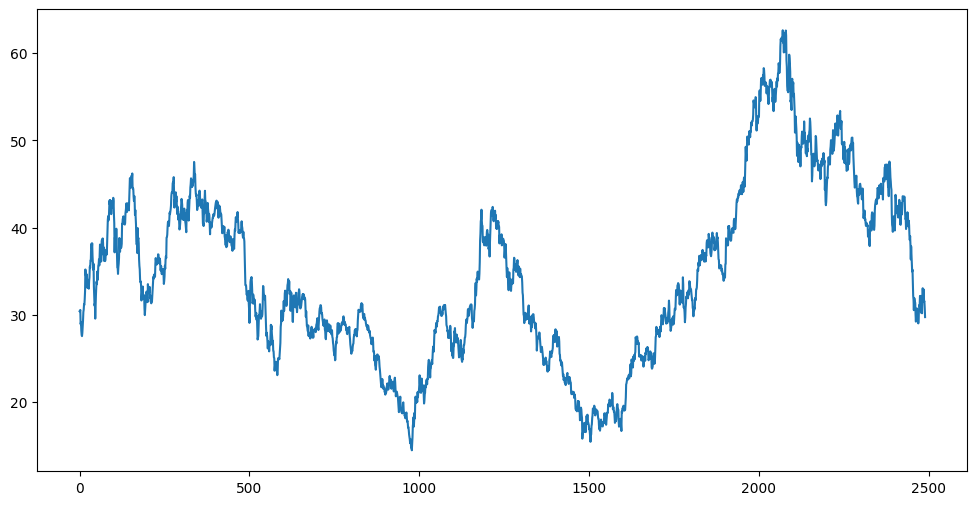

In [868]:
import matplotlib.pyplot as plt

y_train_fig = y_train.reshape(-1, 1)
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_train_fig))

In [869]:
# ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [870]:
model = Sequential()

In [871]:
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

In [872]:
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

In [873]:
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

In [874]:
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

In [875]:
model.add(Dense(units=1))

In [876]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_36 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_37 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_37 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_38 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_38 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_39 (LSTM)              (None, 120)              

In [877]:
model.compile(optimizer="adam", loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50) 

Epoch 1/50


78/78 [==============================] - 10s 111ms/step - loss: 0.0297
Epoch 2/50
78/78 [==============================] - 9s 112ms/step - loss: 0.0085
Epoch 3/50
78/78 [==============================] - 9s 112ms/step - loss: 0.0074
Epoch 4/50
78/78 [==============================] - 9s 110ms/step - loss: 0.0078
Epoch 5/50
78/78 [==============================] - 9s 111ms/step - loss: 0.0070
Epoch 6/50
78/78 [==============================] - 9s 110ms/step - loss: 0.0062
Epoch 7/50
78/78 [==============================] - 9s 111ms/step - loss: 0.0057
Epoch 8/50
78/78 [==============================] - 9s 111ms/step - loss: 0.0052
Epoch 9/50
78/78 [==============================] - 9s 110ms/step - loss: 0.0051
Epoch 10/50
78/78 [==============================] - 9s 110ms/step - loss: 0.0050
Epoch 11/50
78/78 [==============================] - 9s 111ms/step - loss: 0.0048
Epoch 12/50
78/78 [==============================] - 9s 110ms/step - loss: 0.0048
Epoch 13/50
78/78 [================

In [878]:
model.save("keras_model.h5")

/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [839]:
past_100_days = data_train.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [ ]:
final_df.head()

,Close
0,44.318832
1,41.557175
2,40.319340
3,40.084576
4,39.521141


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.16360652],
       [0.14315306],
       [0.13398538],
       ...,
       [0.96407977],
       [0.96630166],
       [0.98963133]])

In [ ]:
input_data.shape

(1211, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(1111, 100, 1)
(1111,)


In [ ]:
# Making Predictions

y_predicted = model.predict(x_test)

35/35 [==============================] - 1s 28ms/step


In [ ]:
y_predicted.shape

(1111, 1)

In [804]:
y_test

array([0.05148093, 0.04609602, 0.05365435, ..., 0.96407977, 0.96630166,
       0.98963133])

In [805]:
y_predicted

array([[0.11807121],
       [0.11798215],
       [0.11772475],
       ...,
       [0.846365  ],
       [0.8575643 ],
       [0.8659166 ]], dtype=float32)

In [806]:
scaler.scale_

array([0.00740622])

In [807]:
y_predicted = scaler.inverse_transform(y_predicted)

In [808]:
# Reshape y_test to a 2D array
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

In [809]:
y_test

array([[ 29.17945862],
       [ 28.45237923],
       [ 29.47291756],
       ...,
       [152.3999939 ],
       [152.69999695],
       [155.8500061 ]])

In [810]:
y_predicted

array([[ 38.170586],
       [ 38.158558],
       [ 38.123802],
       ...,
       [136.50595 ],
       [138.01811 ],
       [139.14584 ]], dtype=float32)

In [811]:
import matplotlib.pyplot as plt

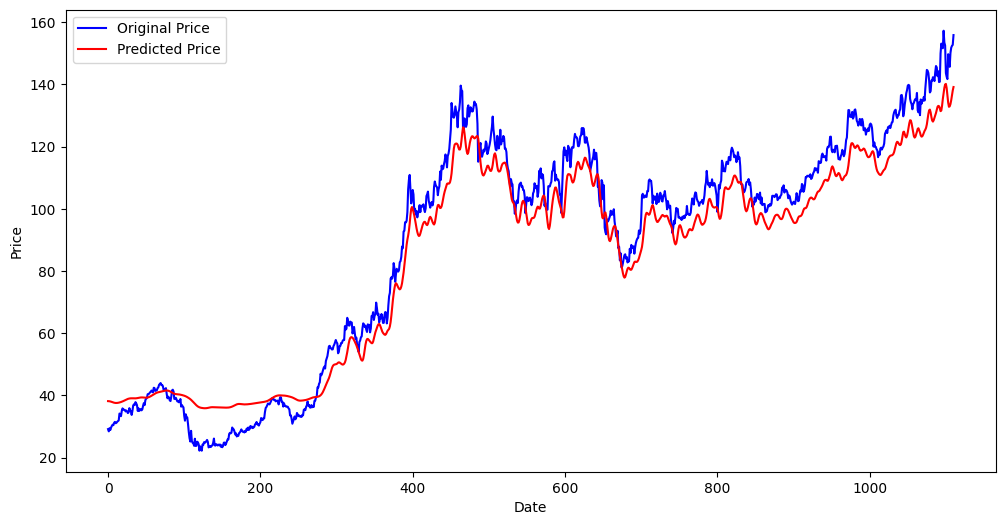

In [812]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

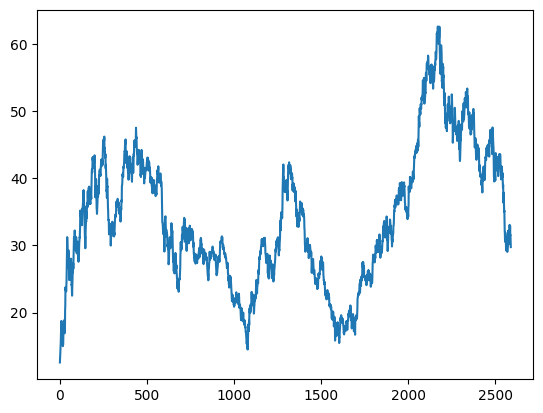

In [574]:
plt.plot(data_train['Close'])

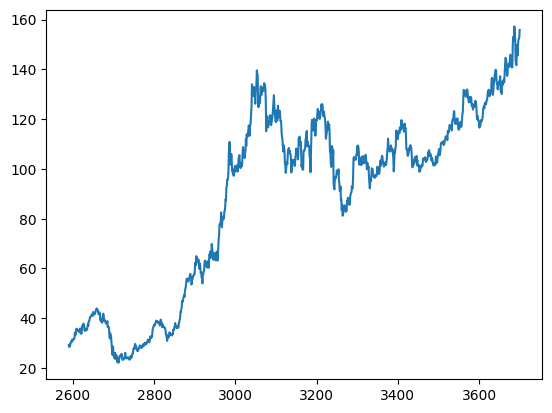

In [575]:
plt.plot(data_test['Close'])

In [576]:
graph_data = pd.DataFrame()
graph_data['Test'] = pd.DataFrame(y_test)

In [577]:
graph_data['Pred'] = pd.DataFrame(y_predicted)
graph_data.head()

,Test,Pred
0,29.179459,37.947449
1,28.452379,37.925182
2,29.472918,37.892311
3,28.903515,37.852753
4,29.696295,37.810162


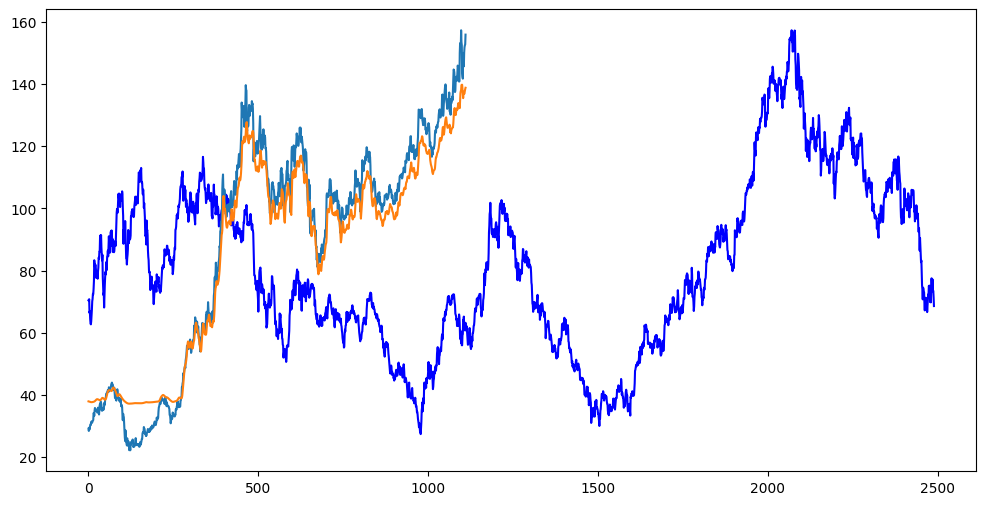

In [578]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_train), 'b')
plt.plot(graph_data[['Test', 'Pred']])


In [579]:
graph_data[['Test', 'Pred']].head()

,Test,Pred
0,29.179459,37.947449
1,28.452379,37.925182
2,29.472918,37.892311
3,28.903515,37.852753
4,29.696295,37.810162


In [580]:
data_train[-10:]

,Close
2580,30.191231
2581,32.284866
2582,33.055744
2583,32.481968
2584,31.715469
2585,32.915585
2586,31.505232
2587,31.579687
2588,30.795668
2589,29.748852


In [581]:
np.array(data_train[-100:])

array([[44.3188324 ],
       [41.55717468],
       [40.31933975],
       [40.08457565],
       [39.52114105],
       [40.05896759],
       [40.07603836],
       [41.30107498],
       [40.34068298],
       [40.37909698],
       [39.67053986],
       [41.33095169],
       [43.75540161],
       [43.28587723],
       [42.11207199],
       [41.65534973],
       [41.68523026],
       [42.48342133],
       [42.48342133],
       [41.36936569],
       [41.15594482],
       [41.49315262],
       [42.04377365],
       [43.18343735],
       [42.90172577],
       [42.83769989],
       [40.38763428],
       [40.31933975],
       [42.1803627 ],
       [42.76940155],
       [42.48342133],
       [41.5102272 ],
       [42.51329803],
       [43.58893585],
       [43.59746933],
       [43.05965424],
       [43.27733994],
       [43.43527603],
       [43.56332397],
       [43.38812256],
       [41.90330887],
       [41.00103378],
       [41.03607559],
       [39.84033966],
       [40.47106171],
       [41

In [582]:
vals = np.append(y_train, np.array(data_train[-100:]))

In [583]:
vals.reshape(-1,1)

array([[ 0.35695501],
       [ 0.35655673],
       [ 0.35967539],
       ...,
       [31.57968712],
       [30.79566765],
       [29.74885178]])

In [584]:
vals.shape

(2590,)

In [585]:
vals

array([ 0.35695501,  0.35655673,  0.35967539, ..., 31.57968712,
       30.79566765, 29.74885178])

In [586]:
data_test[:10]

,Close
2590,29.179459
2591,28.452379
2592,29.472918
2593,28.903515
2594,29.696295
2595,30.208752
2596,30.589809
2597,30.432131
2598,31.194246
2599,31.500847


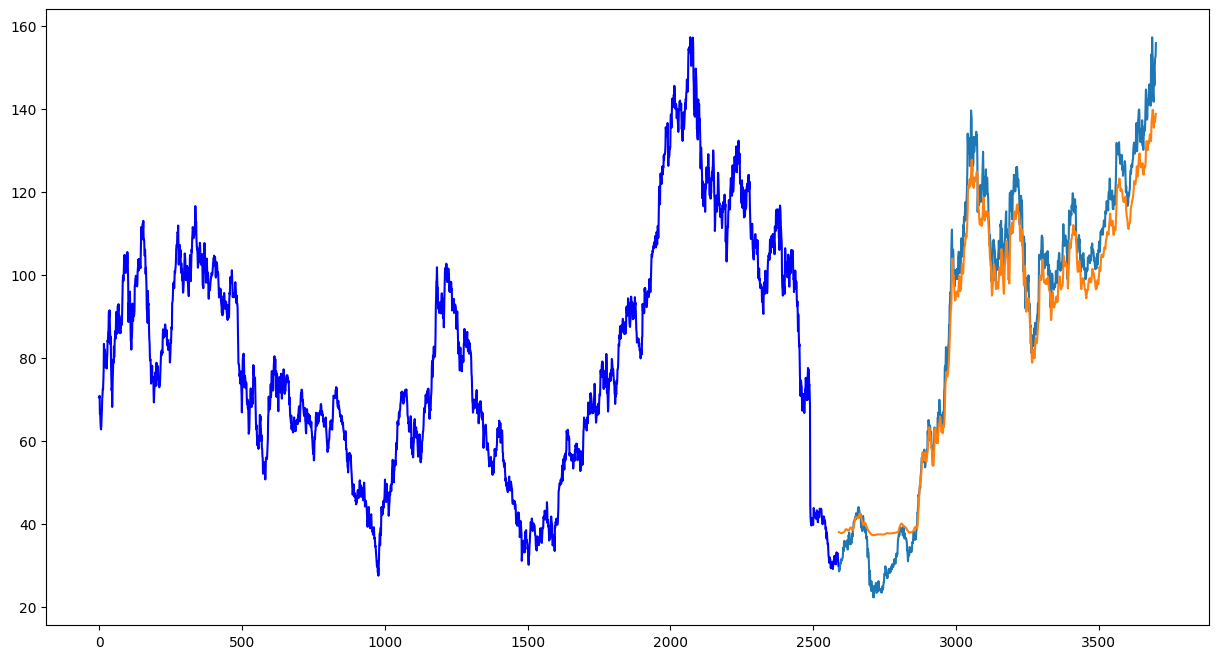

In [588]:
import matplotlib.pyplot as plt

# Assuming graph_data contains the data for the second plot
# Determine the starting point for the second plot


# Plotting the first graph
plt.figure(figsize=(15, 8))

y_train = scaler.inverse_transform(y_train)
y_train = np.append(y_train, np.array(data_train[-100:]))
start_index = len(y_train)
plt.plot(y_train, 'b')

# Plotting the second graph with adjusted x-axis range
plt.plot(range(start_index, start_index + len(graph_data)), graph_data[['Test', 'Pred']])

# Show plot
plt.show()


In [712]:
import os
import yfinance
import pandas as pd

os.chdir('/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/')

data_dir = "data_1"
data_ingestion_artifact_dir_name = "data_ingestion"
data_ingestion_artifact_dir_path = os.path.join(data_dir, data_ingestion_artifact_dir_name)
os.makedirs(data_ingestion_artifact_dir_path, exist_ok=True)


stock_symbol = 'TATAMOTORS.NS'
dataset_filename = stock_symbol[:-3]+".csv"
dataset_filepath = os.path.join(data_ingestion_artifact_dir_path, dataset_filename)

try:
    stock = yfinance.Ticker(stock_symbol)
    dataset = stock.history(period='15y', interval='1d')
    df = pd.DataFrame(dataset)
    df.to_csv(dataset_filepath)
    df = pd.read_csv(dataset_filepath)
    # df = df[['Datetime', 'Open', 'Close']]
    # df.to_csv(dataset_filepath, index=False)
except OSError as e:
    print(f"Exception : {e}")
except Exception as e:
    print(f"Exception : {e}")

/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [714]:
import os
import pandas as pd

os.chdir('/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/')

data_dir = "data_1"
data_preprocessing_artifact_dir_name = "data_preprocessing"
data_preprocessing_artifact_dir_path = os.path.join(data_dir, data_preprocessing_artifact_dir_name)
os.makedirs(data_preprocessing_artifact_dir_path, exist_ok=True)

data_preprocessed_filename = "preprocessed_dataset.csv"
data_preprocessed_filepath = os.path.join(data_preprocessing_artifact_dir_path, data_preprocessed_filename)

try:
    dataset = pd.read_csv("/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/data_1/data_ingestion/TATAMOTORS.csv")

    dataset['Date'] = pd.to_datetime(dataset['Date'])

    dataset = dataset[['Date', 'Close']]

    # Handling Null Values
    if dataset.isna().any().any():  # Check if any value is null
        dataset = dataset.dropna()
    else:
        pass

    # Handling Duplicates
    if dataset.duplicated().any():  # Check if any duplicate rows exist
        dataset = dataset.drop_duplicates()
    else:
        pass

    dataset.to_csv(data_preprocessed_filepath, index=False)
except Exception as e:
    print(f"Exception : {e}")


In [715]:
import os
import pandas as pd

os.chdir('/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/')

data_dir = "data_1"
data_preprocessing_artifact_dir_name = "data_processing"
data_preprocessing_artifact_dir_path = os.path.join(data_dir, data_preprocessing_artifact_dir_name)
os.makedirs(data_preprocessing_artifact_dir_path, exist_ok=True)

data_preprocessed_filename = "processed_dataset.csv"
data_preprocessed_filepath = os.path.join(data_preprocessing_artifact_dir_path, data_preprocessed_filename)

try:
    dataset = pd.read_csv("/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/data_1/data_preprocessing/preprocessed_dataset.csv")

    dataset['Date'] = pd.to_datetime(dataset['Date'])

    dataset = dataset[['Date', 'Close']]

    # Handling Null Values
    if dataset.isna().any().any():  # Check if any value is null
        dataset = dataset.dropna()
    else:
        pass

    # Handling Duplicates
    if dataset.duplicated().any():  # Check if any duplicate rows exist
        dataset = dataset.drop_duplicates()
    else:
        pass
    dataset = dataset.reset_index()
    dataset.to_csv(data_preprocessed_filepath, index=False, date_format='%Y-%m-%d')

except Exception as e:
    print(f"Exception : {e}")

In [716]:
# Read the dataset
import pandas as pd
import numpy as np
dataset_1 = pd.read_csv("/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/data_1/data_processing/processed_dataset.csv")

In [717]:
dataset_1 = pd.DataFrame(dataset_1['Close'])

In [718]:
dataset_1.shape

(3701, 1)

In [719]:
input_data_1 = scaler.fit_transform(dataset_1)

In [720]:
x_test_1 = []
y_test_1 = []

for i in range(100, input_data_1.shape[0]):
    x_test_1.append(input_data_1[i-100:i])
    y_test_1.append(input_data_1[i, 0])

x_test_1, y_test_1 = np.array(x_test_1), np.array(y_test_1)


In [721]:
print(x_test_1.shape)
print(y_test_1.shape)

(3601, 100, 1)
(3601,)


In [722]:
dataset_1[:100]

,Close
0,31.320274
1,32.831654
2,32.777031
3,37.083561
4,38.248966
...,...
95,80.474915
96,81.287697
97,79.375801
98,79.228020


In [723]:
y_test_1[:10]

array([0.05301718, 0.0587899 , 0.06050339, 0.05801104, 0.05880824,
       0.05867079, 0.06349056, 0.0642511 , 0.06244597, 0.06207945])

In [724]:
y_test_1[-10:]

array([0.92901638, 0.90728973, 0.93367919, 0.91909555, 0.90193252,
       0.92618897, 0.94097098, 0.94732034, 0.93983012, 0.95386806])

In [725]:
dataset_1[-10:]

,Close
3691,967.750000
3692,945.849976
3693,972.450012
3694,957.750000
3695,940.450012
3696,964.900024
3697,979.799988
3698,986.200012
3699,978.650024
3700,992.799988


In [726]:
y_predicted_1[-10:]

array([[137.12245],
       [135.50255],
       [134.4465 ],
       [135.98997],
       [136.50586],
       [135.7501 ],
       [136.10341],
       [136.77946],
       [137.33551],
       [137.76474]], dtype=float32)

In [727]:
# Making Predictions

y_predicted_1 = model.predict(x_test_1)

113/113 [==============================] - 4s 32ms/step


In [728]:
y_predicted_1[10:]

array([[0.115206  ],
       [0.11532623],
       [0.11547507],
       ...,
       [0.8494529 ],
       [0.8525546 ],
       [0.85169524]], dtype=float32)

In [729]:
y_predicted_1.shape

(3601, 1)

In [730]:
y_test_1.shape

(3601,)

In [731]:
y_test_1[10:]

array([0.07265363, 0.07260782, 0.07101344, ..., 0.94732034, 0.93983012,
       0.95386806])

In [732]:
y_predicted_1[:10]

array([[0.11459526],
       [0.11456949],
       [0.11455941],
       [0.11458099],
       [0.11463198],
       [0.11470422],
       [0.1147871 ],
       [0.11488181],
       [0.11498973],
       [0.11510158]], dtype=float32)

In [733]:
y_test_1 = y_test_1.reshape(-1, 1)
y_test_1 = scaler.inverse_transform(y_test_1)
y_test_1 = np.append(np.array(dataset_1[:100]), y_test_1)
y_predicted_1 = scaler.inverse_transform(y_predicted_1)

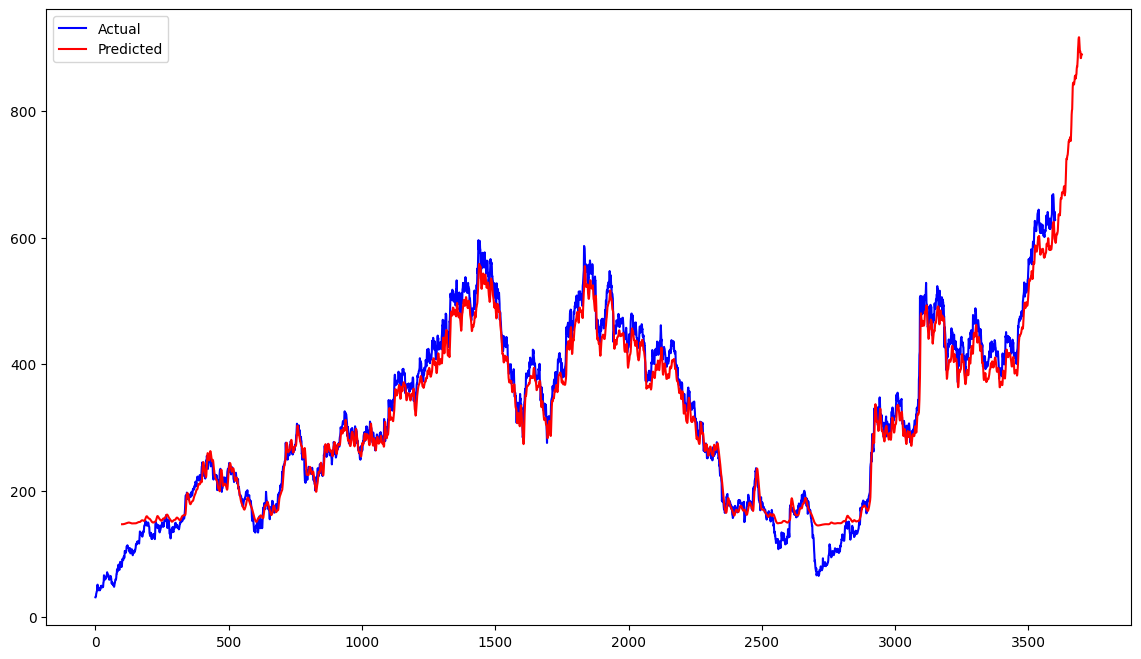

In [736]:
plt.figure(figsize=(14, 8))
plt.plot(y_test_1[:-100], 'b', label='Actual')
plt.plot(range(100, len(y_predicted_1) + 100), y_predicted_1, 'r', label='Predicted')
plt.legend()
plt.show()


In [737]:
ma100 = dataset_1['Close'].rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3696    806.645501
3697    810.178001
3698    813.629501
3699    817.131002
3700    820.772501
Name: Close, Length: 3701, dtype: float64

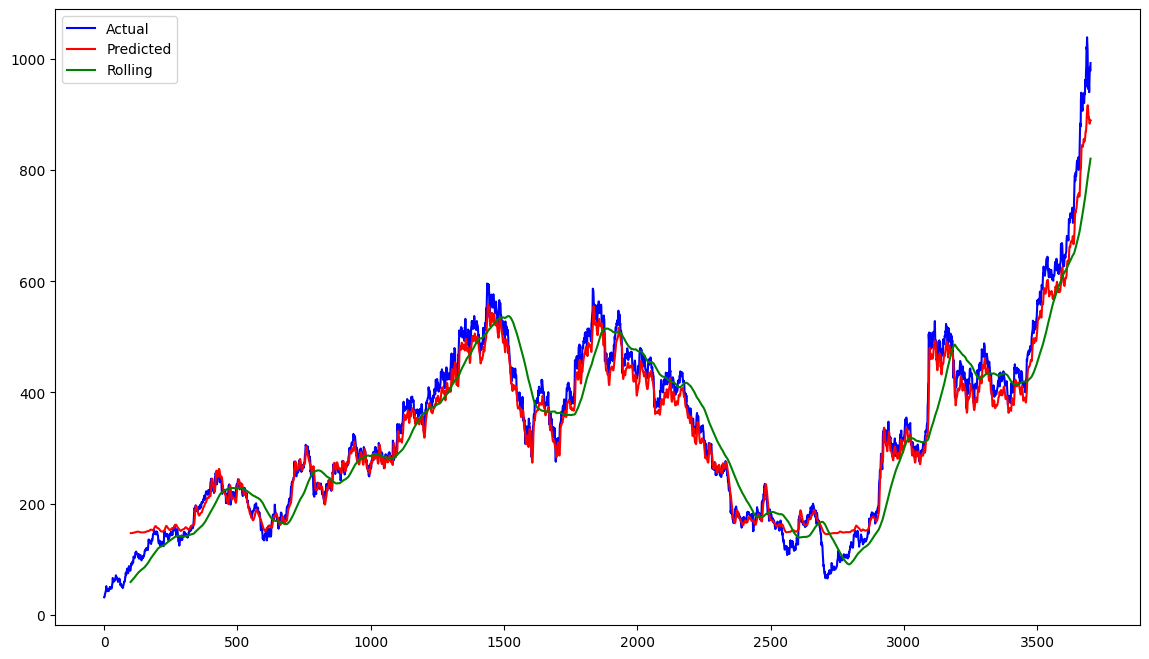

In [740]:

plt.figure(figsize=(14, 8))
plt.plot(y_test_1, 'b', label='Actual')
plt.plot(range(100, len(y_predicted_1) + 100), y_predicted_1, 'r', label='Predicted')
plt.plot(ma100, 'g', label='Rolling')
plt.legend()
plt.show()
